<a href="https://colab.research.google.com/github/ccastano1997/EnzymeClassifier/blob/main/EnzymeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.5 MB/s eta 0:00:00


**Calculate Amino Acid Frequencies**

In [3]:
from Bio import SeqIO
from collections import Counter

def calculate_aa_frequencies(sequence):
  """
  Calculates the frequency of each amino acid in a protein sequence.

  Args:
    sequence: A string representing the protein sequence.

  Returns:
    A dictionary where keys are amino acid letters and values are their frequencies.
  """
  amino_acids = Counter(sequence)
  total_aa = len(sequence)
  frequencies = {aa: count / total_aa for aa, count in amino_acids.items()}
  return frequencies

# Example usage:
enzyme_sequences = list(SeqIO.parse("enzymes.fasta", "fasta"))
non_enzyme_sequences = list(SeqIO.parse("non_enzymes.fasta", "fasta"))

all_sequences = enzyme_sequences + non_enzyme_sequences
all_frequencies = []
for sequence_record in all_sequences:
  sequence = str(sequence_record.seq)
  frequencies = calculate_aa_frequencies(sequence)
  all_frequencies.append(frequencies)

In [4]:
import pandas as pd

# Create a list to store the data for the DataFrame
data = []
for i, sequence_record in enumerate(all_sequences):
  row = all_frequencies[i]
  row['sequence_id'] = sequence_record.id  # Get the sequence ID from the FASTA record
  if i < len(enzyme_sequences):
    row['class'] = 1  # Enzyme
  else:
    row['class'] = 0  # Non-enzyme
  data.append(row)

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("enzyme_data.csv", index=False)

In [6]:
import pandas as pd
from Bio import SeqIO
from collections import Counter

# ... (previous code for calculating amino acid frequencies) ...

# Create a list to store the data for the DataFrame
data = []
for i, sequence_record in enumerate(all_sequences):
  row = all_frequencies[i]
  row['sequence_id'] = sequence_record.id  # Get the sequence ID from the FASTA record
  if i < len(enzyme_sequences):
    row['class'] = 1  # Enzyme
  else:
    row['class'] = 0  # Non-enzyme
  data.append(row)

# Create a DataFrame
df = pd.DataFrame(data)

# Fill missing values with 0
df.fillna(0, inplace=True)

# Save to CSV
df.to_csv("enzyme_data2.csv", index=False)

In [7]:
pip install pandas scikit-learn


In [12]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the data
data = pd.read_csv("enzyme_fixeddata2.csv")


# 2. Separate features (X) and target variable (y)
#X = data.drop('class', axis=1)  # Features (all columns except 'class')
X = data.drop(['class', 'sequence_id'], axis=1)  # Remove both 'class' and 'sequence_id'
y = data['class']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the SVM model
model = SVC(kernel='linear')  # You can experiment with different kernels later
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#7. f1- matrix
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
#8. confusion _matrix
cm = confusion_matrix(y_test, y_pred)
#print("Confusion Matrix:")
#print(cm)

Accuracy: 0.6892655367231638
F1 Score: 0.7619047619047619


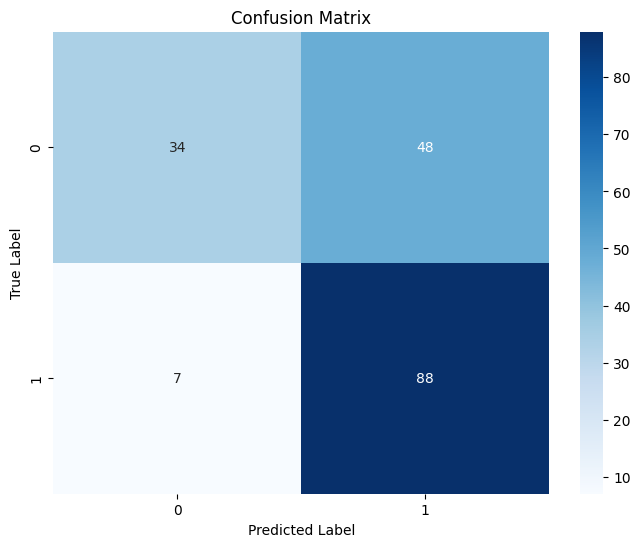

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Attempt 2 fixing dataset**

In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the data
data = pd.read_csv("enzyme_data2.csv")


# 2. Separate features (X) and target variable (y)
#X = data.drop('class', axis=1)  # Features (all columns except 'class')
X = data.drop(['class', 'sequence_id'], axis=1)  # Remove both 'class' and 'sequence_id'
y = data['class']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the SVM model
model = SVC(kernel='rbf')  # You can experiment with different kernels later
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#7. f1- matrix
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
#8. confusion _matrix
cm = confusion_matrix(y_test, y_pred)
#print("Confusion Matrix:")
#print(cm)

Accuracy: 0.8531073446327684
F1 Score: 0.865979381443299


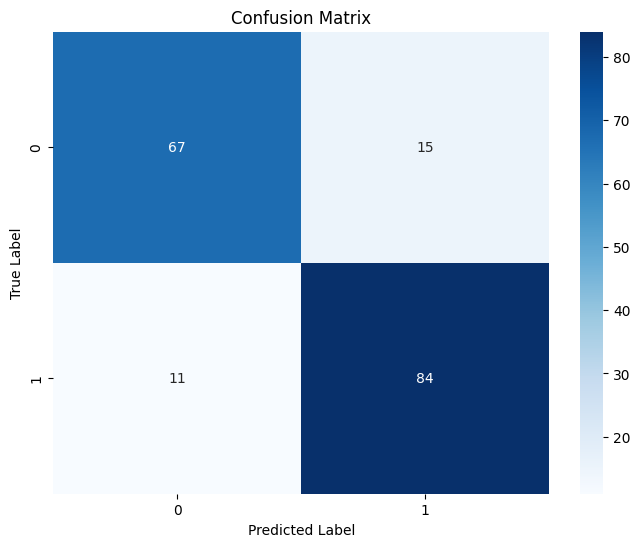

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1. Dimensionality Reduction

Principal Component Analysis (PCA):

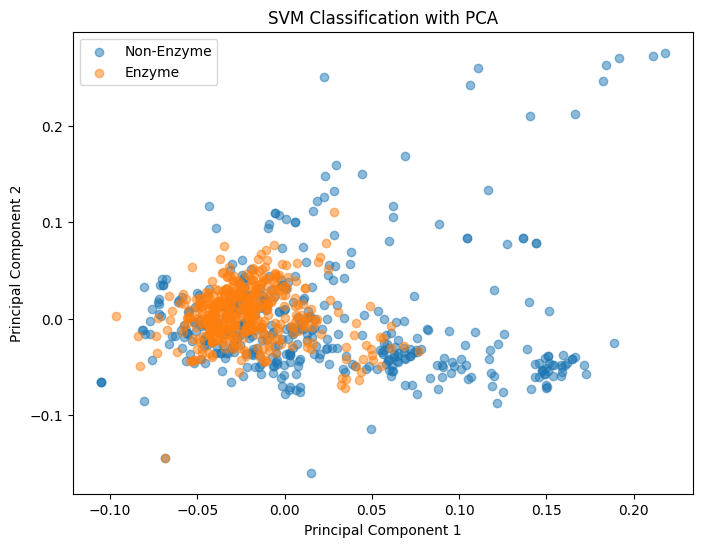

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data points with different colors for enzymes and non-enzymes
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label="Non-Enzyme", alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label="Enzyme", alpha=0.5)

# (Optional) Add the decision boundary (this can be more complex with non-linear kernels)
# ...

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("SVM Classification with PCA")
plt.show()

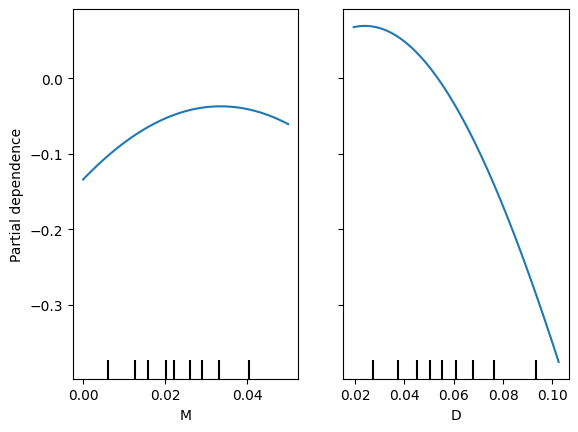

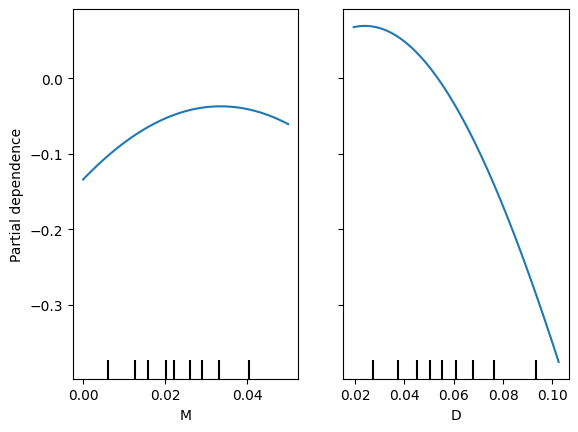

In [21]:
from sklearn.inspection import PartialDependenceDisplay

# Create the PDP plot
features = [0, 1]  # Example: visualize the first two amino acid frequencies
display = PartialDependenceDisplay.from_estimator(model, X, features)
display.plot()
plt.show()

**Grid Search**

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
# ... (calculate accuracy, F1 score, confusion matrix) ...

Best Hyperparameters: {'C': 100, 'gamma': 10}


In [24]:
y_pred = best_model.predict(X_test)

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8587570621468926
F1 Score: 0.8704663212435233
Confusion Matrix:
[[68 14]
 [11 84]]


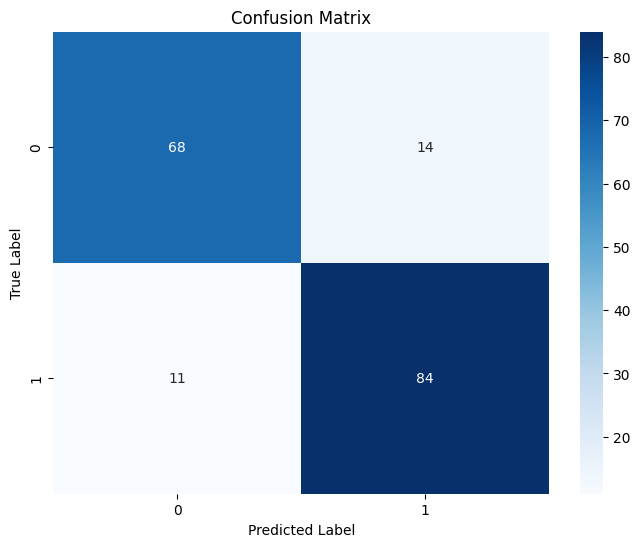

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Further Renfinement**

In [26]:
from sklearn.model_selection import GridSearchCV

# ... (your existing code) ...

# Define the refined parameter grid
param_grid = {
    'C': [75, 100, 125, 150],
    'gamma': [7.5, 10, 12.5, 15]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
# ... (calculate accuracy, F1 score, confusion matrix) ...

Best Hyperparameters: {'C': 125, 'gamma': 7.5}


In [27]:
y_pred = best_model.predict(X_test)

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8587570621468926
F1 Score: 0.8704663212435233
Confusion Matrix:
[[68 14]
 [11 84]]


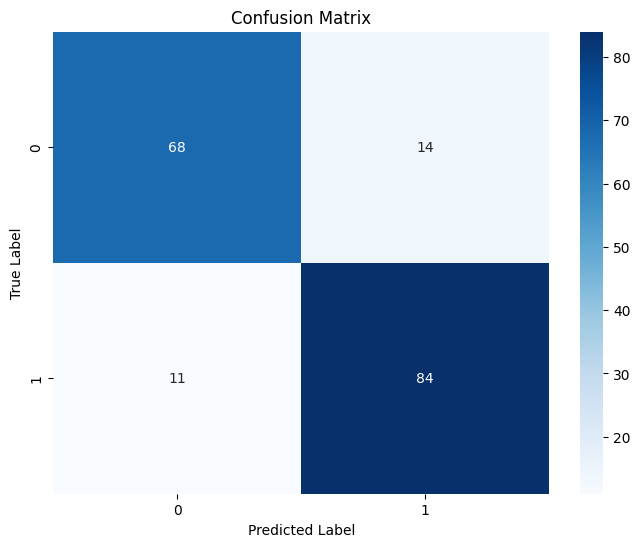

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
